In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

In [2]:
df=pd.read_csv("../data/고객db_전처리.csv",index_col=0)

In [3]:
df.head(2)

,이름,생년월일,현재 나이,연령대,성별,휴대폰 번호,이메일,고객 구분,아이디,가입일,...,최근 구매 시점,최근 구매 요일,마지막 구매 이후 경과 기간,최근 구매 당시 나이,최근 거래 금액,선호 거래 방식,선호 구매 경로,차량 구매 횟수,신차 구매 지수,브랜드 충성도 지수
연번,,,,,,,,,,,,,,,,,,,,,
1,강주온,2002-03-04,23,20대 중반,남,010-6502-8753,janisi@himedia.co.kr,법인,14798,2023-04-01,...,2분기,평일,350,22,33820000,신용카드,오프라인,1,0.002,0.135
2,김경수,1983-01-02,42,40대 초반,남,010-1111-2222,kimkyoungsoo31@himedia.co.kr,법인,kyoungsoo031,2025-02-09,...,1분기,평일,38,42,89930000,신용카드,오프라인,5,0.508,0.037


In [5]:
# 구매 연도에따른 구매제품 분석

In [6]:
category_df=df[["최근 구매 제품","최근 거래 금액","최근 구매 날짜"]]

In [7]:
category_df

,최근 구매 제품,최근 거래 금액,최근 구매 날짜
연번,,,
1,Avante (CN7 N),33820000,2024-04-04
2,G80 (RG3),89930000,2025-02-10
3,NEXO (FE),70990000,2025-03-10
4,Santa-Fe ™,50970000,2023-05-01
5,G70 (IK),49890000,2023-10-01
...,...,...,...
288,G80 (RG3),84310000,2024-12-20
289,Avante (CN7 N),35670000,2023-08-24
290,NEXO (FE),70990000,2024-01-12


In [8]:
# 연도만 빼기
category_df["최근 구매 날짜"]=category_df["최근 구매 날짜"].str[:4]

/var/folders/_k/9pcm610n0sb_j9n64tc8zgcw0000gn/T/ipykernel_75775/3678036121.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_df["최근 구매 날짜"]=category_df["최근 구매 날짜"].str[:4]


In [9]:
category_df

,최근 구매 제품,최근 거래 금액,최근 구매 날짜
연번,,,
1,Avante (CN7 N),33820000,2024
2,G80 (RG3),89930000,2025
3,NEXO (FE),70990000,2025
4,Santa-Fe ™,50970000,2023
5,G70 (IK),49890000,2023
...,...,...,...
288,G80 (RG3),84310000,2024
289,Avante (CN7 N),35670000,2023
290,NEXO (FE),70990000,2024


In [10]:
result=category_df.groupby(["최근 구매 날짜","최근 구매 제품"])[["최근 거래 금액"]].count().reset_index()

In [11]:
result=result.rename(columns={"최근 거래 금액":"판매량"})

In [12]:
result

,최근 구매 날짜,최근 구매 제품,판매량
0,2023,Avante (CN7 N),20
1,2023,G70 (IK),27
2,2023,G80 (RG3),16
3,2023,Grandeur (GN7 HEV),3
4,2023,IONIQ (AE EV),2
5,2023,NEXO (FE),22
6,2023,Palisade (LX2),1
7,2023,Santa-Fe (MX5 PHEV),1
8,2023,Santa-Fe ™,19
9,2023,Tucson (NX4 PHEV),1


In [13]:
result['최근 구매 제품'].nunique()

14

In [14]:
result['최근 구매 날짜'].unique()

array(['2023', '2024', '2025'], dtype=object)

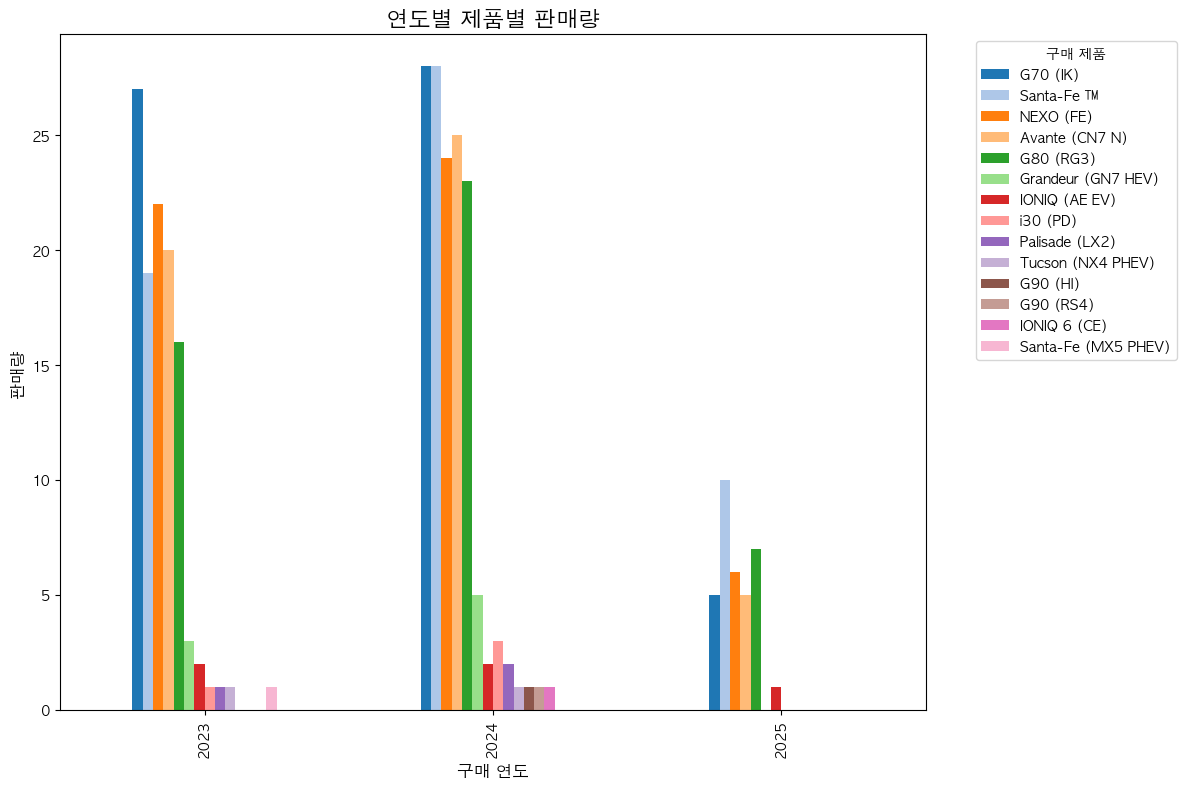

In [15]:
# 구매 연도별 제품 판매량 합산 (피벗 테이블)
df_pivot = result.pivot_table(index='최근 구매 날짜', columns='최근 구매 제품', values='판매량', fill_value=0)

# 제품별 총 판매량 기준으로 정렬
df_pivot = df_pivot[df_pivot.sum().sort_values(ascending=False).index]

# 연도 정렬 (오름차순)
df_pivot = df_pivot.sort_index(ascending=True)

# 14개 색상 설정 (Seaborn의 'tab20'에서 14개 색 추출)
color_list = sb.color_palette("tab20", 14)

# 스택형 막대 그래프 그리기
ax = df_pivot.plot(kind='bar', figsize=(12, 8), color=color_list)

# 그래프 제목 및 레이블 설정
ax.set_title('연도별 제품별 판매량', fontsize=16)
ax.set_xlabel('구매 연도', fontsize=12)
ax.set_ylabel('판매량', fontsize=12)

# 범례 설정
plt.legend(title='구매 제품', bbox_to_anchor=(1.05, 1), loc='upper left')

# 그래프 표시
plt.tight_layout()
plt.show() 

In [ ]:
# 각 연도별로 가장 많이 팔린 제품들의 공통점?
# 차량 유형/사이즈/연료 종류 등 어떤 공통점이든 찾아볼 필요

In [ ]:
# 연도별 차량 유형

In [6]:
type_df=df[["차량 유형","최근 거래 금액","최근 구매 날짜"]]

In [7]:
type_df

,차량 유형,최근 거래 금액,최근 구매 날짜
연번,,,
1,세단,33820000,2024-04-04
2,세단,89930000,2025-02-10
3,SUV,70990000,2025-03-10
4,SUV,50970000,2023-05-01
5,세단,49890000,2023-10-01
...,...,...,...
288,세단,84310000,2024-12-20
289,세단,35670000,2023-08-24
290,SUV,70990000,2024-01-12


In [ ]:
# 연도만 빼기
type_df["최근 구매 날짜"]=type_df["최근 구매 날짜"].str[:4]

/var/folders/6y/dhcn_x315mxfr5mf45wd9ctw0000gp/T/ipykernel_2075/1209472796.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  type_df["최근 구매 날짜"]=type_df["최근 구매 날짜"].str[:4]


In [9]:
type_df=type_df.groupby(["최근 구매 날짜","차량 유형"])[["최근 거래 금액"]].count().reset_index()

In [12]:
type_df=type_df.rename(columns={"최근 거래 금액":"판매량"})

In [13]:
type_df

,최근 구매 날짜,차량 유형,판매량
0,2023,SUV,44
1,2023,세단,66
2,2023,해치백,3
3,2024,SUV,55
4,2024,세단,84
5,2024,해치백,5
6,2025,SUV,16
7,2025,세단,17
8,2025,해치백,1


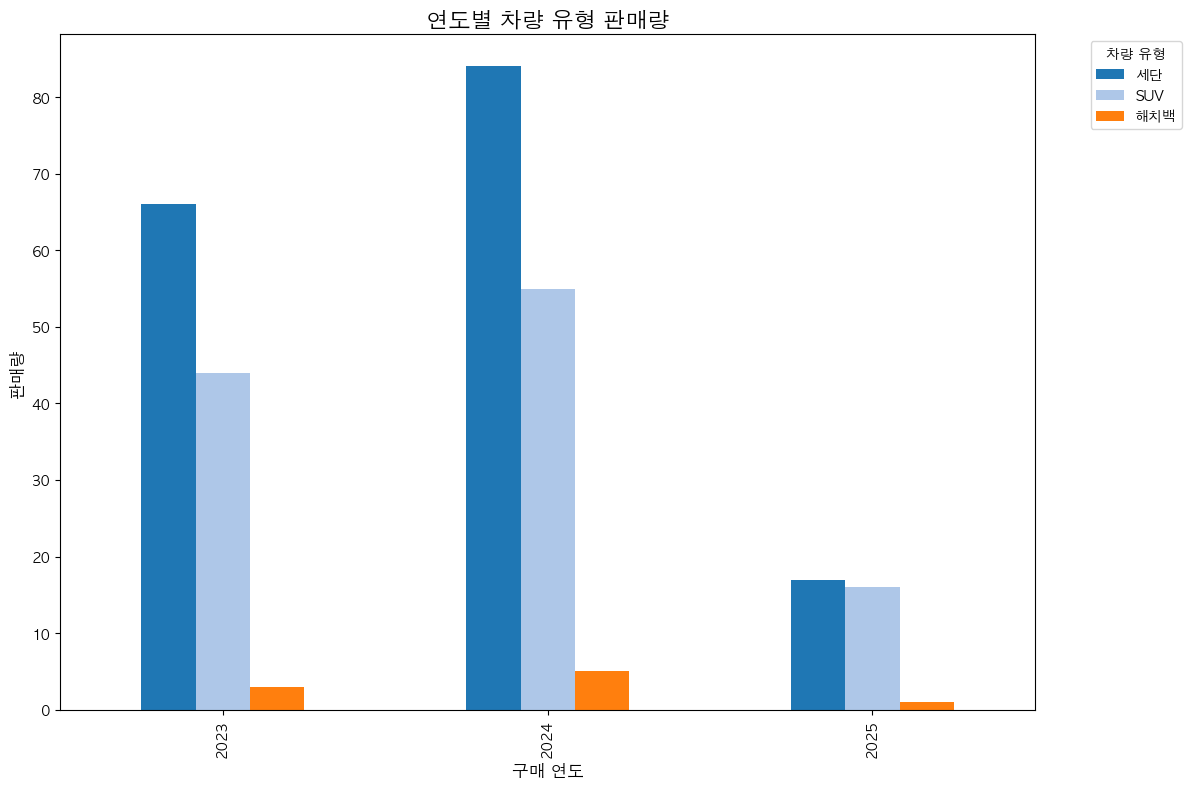

In [14]:
# 구매 연도별 제품 판매량 합산 (피벗 테이블)
df_pivot = type_df.pivot_table(index='최근 구매 날짜', columns='차량 유형', values='판매량', fill_value=0)

# 제품별 총 판매량 기준으로 정렬
df_pivot = df_pivot[df_pivot.sum().sort_values(ascending=False).index]

# 연도 정렬 (오름차순)
df_pivot = df_pivot.sort_index(ascending=True)

# 14개 색상 설정 (Seaborn의 'tab20'에서 14개 색 추출)
color_list = sb.color_palette("tab20", 14)

# 스택형 막대 그래프 그리기
ax = df_pivot.plot(kind='bar', figsize=(12, 8), color=color_list)

# 그래프 제목 및 레이블 설정
ax.set_title('연도별 차량 유형 판매량', fontsize=16)
ax.set_xlabel('구매 연도', fontsize=12)
ax.set_ylabel('판매량', fontsize=12)

# 범례 설정
plt.legend(title='차량 유형', bbox_to_anchor=(1.05, 1), loc='upper left')

# 그래프 표시
plt.tight_layout()
plt.show() 

In [22]:
size_df=df[["차량 사이즈","최근 거래 금액","최근 구매 날짜"]]

In [23]:
# 연도만 빼기
size_df["최근 구매 날짜"]=size_df["최근 구매 날짜"].str[:4]

/var/folders/6y/dhcn_x315mxfr5mf45wd9ctw0000gp/T/ipykernel_2075/3731493134.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  size_df["최근 구매 날짜"]=size_df["최근 구매 날짜"].str[:4]


In [24]:
size_df=size_df.groupby(["최근 구매 날짜","차량 사이즈"])[["최근 거래 금액"]].count().reset_index()

In [25]:
size_df=size_df.rename(columns={"최근 거래 금액":"판매량"})

In [26]:
size_df

,최근 구매 날짜,차량 사이즈,판매량
0,2023,대형,16
1,2023,준대형,4
2,2023,준중형,24
3,2023,중형,69
4,2024,대형,24
5,2024,준대형,7
6,2024,준중형,31
7,2024,중형,81
8,2024,프리미엄,1
9,2025,대형,7


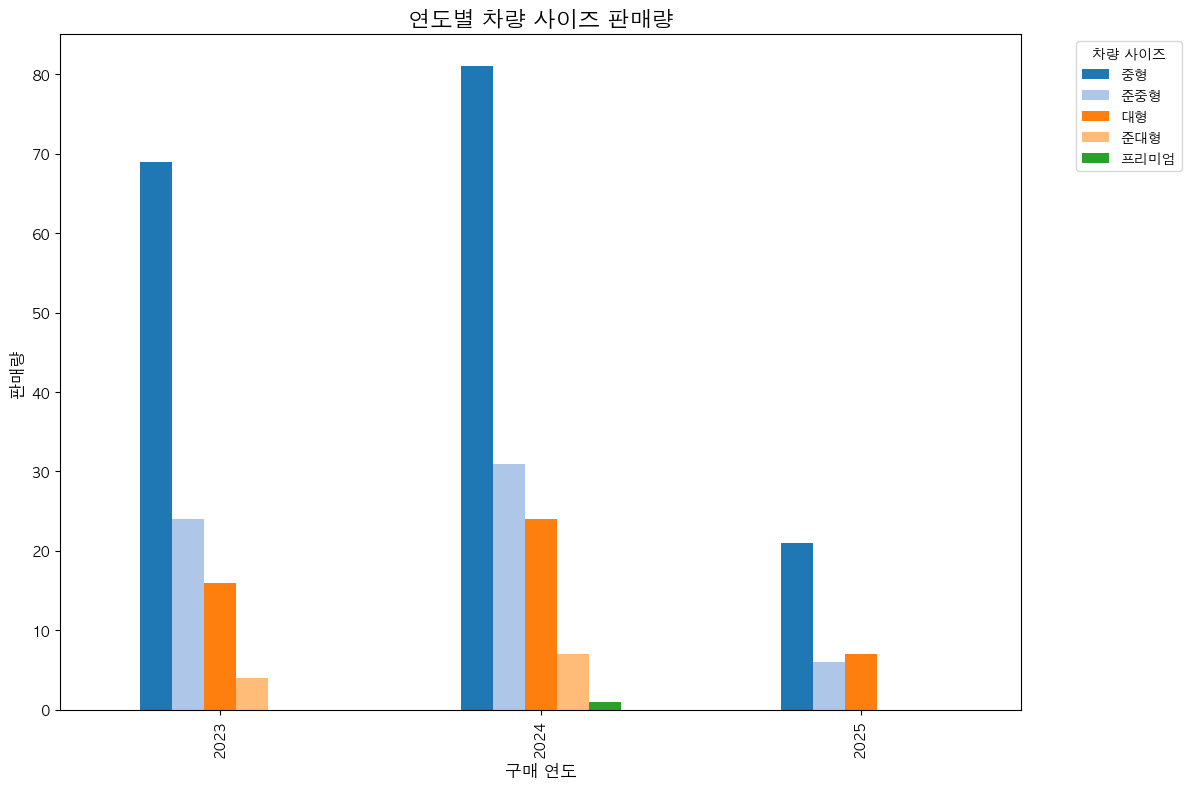

In [27]:
# 구매 연도별 제품 판매량 합산 (피벗 테이블)
df_pivot = size_df.pivot_table(index='최근 구매 날짜', columns='차량 사이즈', values='판매량', fill_value=0)

# 제품별 총 판매량 기준으로 정렬
df_pivot = df_pivot[df_pivot.sum().sort_values(ascending=False).index]

# 연도 정렬 (오름차순)
df_pivot = df_pivot.sort_index(ascending=True)

# 14개 색상 설정 (Seaborn의 'tab20'에서 14개 색 추출)
color_list = sb.color_palette("tab20", 14)

# 스택형 막대 그래프 그리기
ax = df_pivot.plot(kind='bar', figsize=(12, 8), color=color_list)

# 그래프 제목 및 레이블 설정
ax.set_title('연도별 차량 사이즈 판매량', fontsize=16)
ax.set_xlabel('구매 연도', fontsize=12)
ax.set_ylabel('판매량', fontsize=12)

# 범례 설정
plt.legend(title='차량 사이즈', bbox_to_anchor=(1.05, 1), loc='upper left')

# 그래프 표시
plt.tight_layout()
plt.show() 

In [30]:

fuel_df=df[["연료 구분","최근 거래 금액","최근 구매 날짜"]]

In [31]:
# 연도만 빼기
fuel_df["최근 구매 날짜"]=fuel_df["최근 구매 날짜"].str[:4]

/var/folders/6y/dhcn_x315mxfr5mf45wd9ctw0000gp/T/ipykernel_2075/3395391315.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fuel_df["최근 구매 날짜"]=fuel_df["최근 구매 날짜"].str[:4]


In [32]:
fuel_df=fuel_df.groupby(["최근 구매 날짜","연료 구분"])[["최근 거래 금액"]].count().reset_index()

In [33]:
fuel_df=fuel_df.rename(columns={"최근 거래 금액":"판매량"})

In [34]:
fuel_df

,최근 구매 날짜,연료 구분,판매량
0,2023,디젤,20
1,2023,수소,22
2,2023,전기,2
3,2023,플러그인 하이브리드,2
4,2023,하이브리드,3
5,2023,휘발유,64
6,2024,디젤,30
7,2024,수소,24
8,2024,전기,3
9,2024,플러그인 하이브리드,1


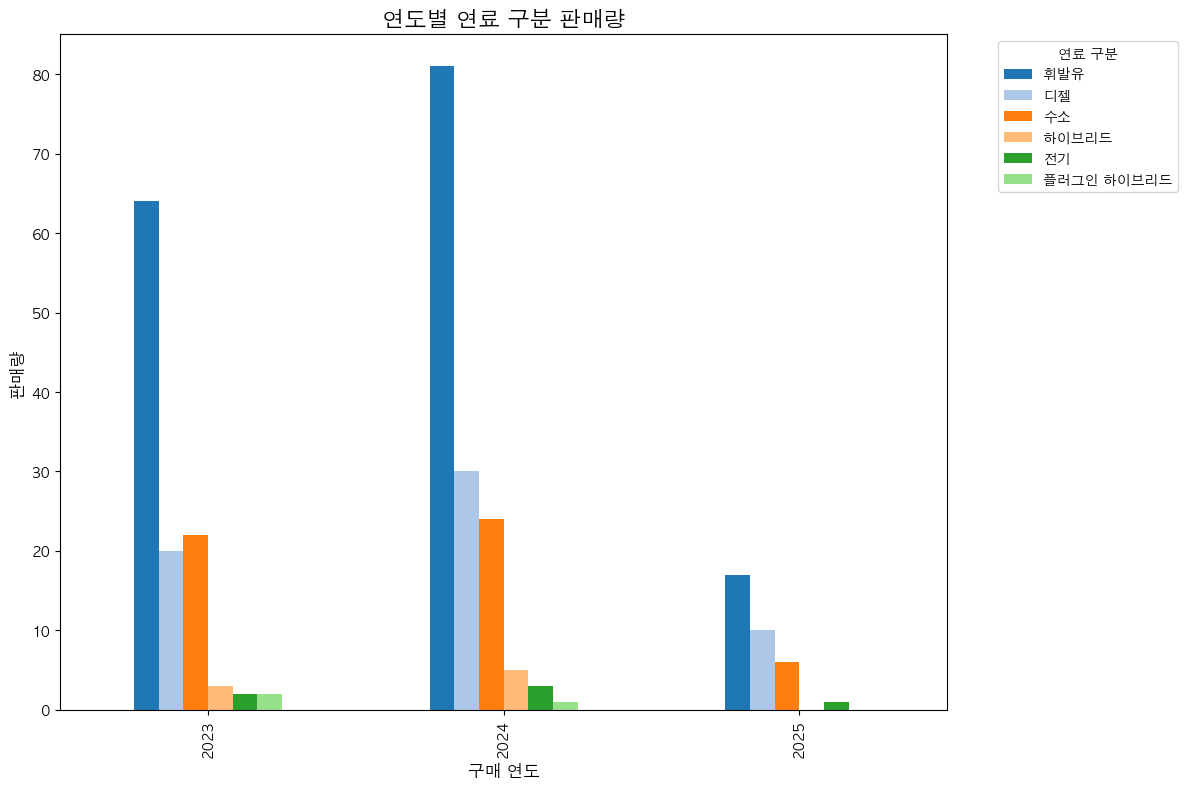

In [36]:
# 구매 연도별 제품 판매량 합산 (피벗 테이블)
df_pivot = fuel_df.pivot_table(index='최근 구매 날짜', columns='연료 구분', values='판매량', fill_value=0)

# 제품별 총 판매량 기준으로 정렬
df_pivot = df_pivot[df_pivot.sum().sort_values(ascending=False).index]

# 연도 정렬 (오름차순)
df_pivot = df_pivot.sort_index(ascending=True)

# 14개 색상 설정 (Seaborn의 'tab20'에서 14개 색 추출)
color_list = sb.color_palette("tab20", 14)

# 스택형 막대 그래프 그리기
ax = df_pivot.plot(kind='bar', figsize=(12, 8), color=color_list)

# 그래프 제목 및 레이블 설정
ax.set_title('연도별 연료 구분 판매량', fontsize=16)
ax.set_xlabel('구매 연도', fontsize=12)
ax.set_ylabel('판매량', fontsize=12)

# 범례 설정
plt.legend(title='연료 구분', bbox_to_anchor=(1.05, 1), loc='upper left')

# 그래프 표시
plt.tight_layout()
plt.show() 

In [ ]:
# 연도별 판매량 변화
# •	2023년까지 코로나19로 인해 소비 심리가 위축되었으나, 2024년에는 경기 회복과 함께 자동차 수요가 증가하였습니다.
# •	신형 모델 출시, 하이브리드 추가, SUV 선호 증가로 2024년 싼타페 판매가 급증 했습니다.
# •	G70은 세련된 디자인, 뛰어난 성능, 고급스러운 인테리어로 소비자들에게 높은 선호를 받고 있습니다.

# 연도별 차량 유형별 판매량 변화
# •	SUV와 세단이 2023~2024년까지 높은 판매량을 기록
# •	2025년에는 SUV와 세단의 판매 차이가 줄었다. 이유는 금리 인상과 전기차 정책 변화로 SUV 수요가 감소하고, 세단의 수요가 상대적으로 안정세를 보였기 때문이다.

# 연도별 차량 크기별 판매량 변화
# •	중형 및 준중형 차량의 판매량이 2023~2024년에는 증가

# 연도별 연료 구분별 판매량 변화
# •	전기차 및 하이브리드 차량의 판매량은 2024년까지 증가
# •	2024년도 디젤의 판매량이 수소의 판매량보다 높다. 이유는 수소차의 인프라 부족과 가격 부담 등으로 소비자들이 상대적으로 저렴한 디젤차를 선호했기 때문에 보이는 형상같다.

# 종합 분석 및 결론
# •	2024년은 코로나19 이후 경기 회복과 새로운 자동차 모델들이 소비자들의 선택을 이끌어내면서 판매량이 증가
# •	G70은 세련된 디자인과 뛰어난 성능, 고급스러운 인테리어 덕분에 소비자들의 높은 선호를 받으며 지속적인 인기
# •	2023~2024년 동안 SUV와 세단의 판매량이 높게 유지
# •	중형 및 준중형 차량의 판매량이 증가했습니다. 이는 소비자들이 경제성과 실용성을 중시하는 경향을 보였기 때문으로 분석
# •	전기차와 하이브리드 차량의 판매량이 2024년까지 증가하는 추세를 보였으며, 디젤차와 수소차 간 판매량 차이도 나타남
# •	2024년에는 수소차의 인프라 부족과 가격 부담 등으로 인해 소비자들이 상대적으로 저렴한 디젤차를 선호하게 되었고, 디젤차의 판매량이 수소차를 넘었음